In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import imageio
import moviepy.editor as mp
import ffmpy

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
if path_parent.endswith("Abaqus-Macromechanics-Project"):
    os.chdir(path_parent) 
    print("Moving up to the parent directory")
    print(os.getcwd())

The current directory is: 
\\home.org.aalto.fi\zopev1\data\Desktop\Abaqus-Macromechanics-Project\notebooks\results_vedant


In [6]:
from stage0_configs import *
from modules.SOO_SIM import *
from modules.helper import *
from modules.hardeningLaws import *
info = main_config()

taskName = "A1" # A1 A2 A3 A4
result = "B" # B for Binh's result, V for Vedant's result

if result == "B":
    loss_function = lossFD
    if taskName == "A1":
        info['targetPath'] = "SOO_targets/DP1000_room_Swift_NDBR50_curve2"
        info['resultPath'] = "SOO_results/DP1000_room_Swift_NDBR50_curve2"

    if taskName == "A2":
        info['targetPath'] = "SOO_targets/DP1000_room_SwiftVoce_NDBR50_curve2"
        info['resultPath'] = "SOO_results/DP1000_room_SwiftVoce_NDBR50_curve2"

    if taskName == "A3":
        info['targetPath'] = "SOO_targets/DP1000_room_SwiftVoce_NDBR50_curve1"
        info['resultPath'] = "SOO_results/DP1000_room_SwiftVoce_NDBR50_curve1"

    if taskName == "A4":
        info['targetPath'] = "SOO_targets/DP1000_400C_SwiftVoce_NDBR50_curve1"
        info['resultPath'] = "SOO_results/DP1000_400C_SwiftVoce_NDBR50_curve1"

if result == "V":
    loss_function = Vedant_lossFD
    if taskName == "A1":
        info['targetPath'] = "SOO_targets/DP1000_room_Swift_NDBR50_curve2"
        info['resultPath'] = "SOO_results/Vedant/DP1000_room_Swift_NDBR50_curve2"

    if taskName == "A2":
        info['targetPath'] = "SOO_targets/DP1000_room_SwiftVoce_NDBR50_curve2"
        info['resultPath'] = "SOO_results/Vedant/DP1000_room_SwiftVoce_NDBR50_curve2"

    if taskName == "A3":
        info['targetPath'] = "SOO_targets/DP1000_room_SwiftVoce_NDBR50_curve1"
        info['resultPath'] = "SOO_results/Vedant/DP1000_room_SwiftVoce_NDBR50_curve1"

    if taskName == "A4":
        info['targetPath'] = "SOO_targets/DP1000_400C_SwiftVoce_NDBR50_curve1"
        info['resultPath'] = "SOO_results/Vedant/DP1000_400C_SwiftVoce_NDBR50_curve1"

ModuleNotFoundError: No module named 'stage0_configs'

In [4]:
# Add column force,N to the target curve
# Create new dataframe
df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
targetCurve = pd.read_csv(f"{info['targetPath']}/FD_Curve.csv")
df['displacement/mm'] = targetCurve['displacement/mm']
df['force/kN'] = targetCurve['force/N'] * 1e-3
df['force/N'] = targetCurve['force/N']
df.to_csv(f"{info['targetPath']}/FD_Curve.csv",index=False)

NameError: name 'info' is not defined

# Iteration guess FD curve simulations

The parameters of the last iteration are: 
(('c1', 1583.2650841813934), ('c2', 0.0005417848120337915), ('c3', 0.10082970195952781))


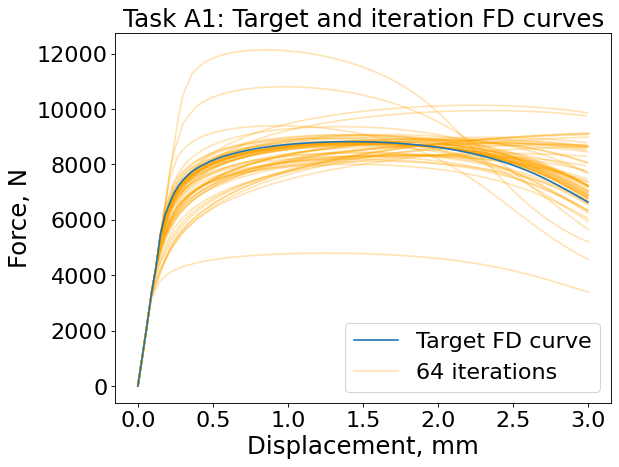

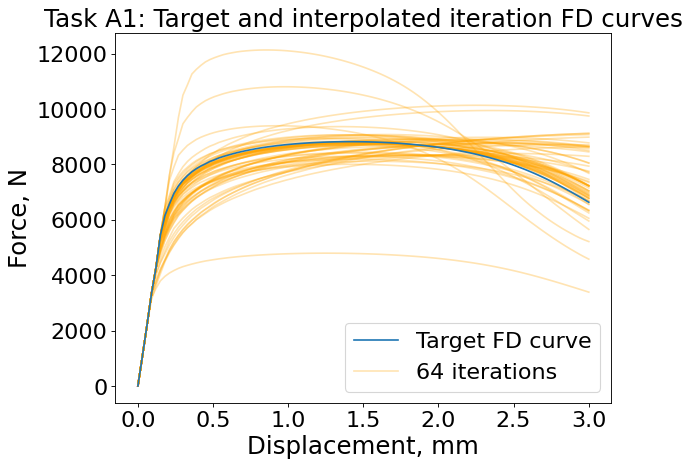

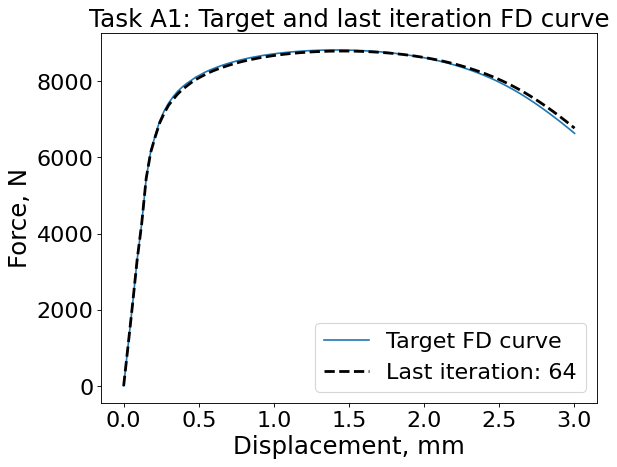

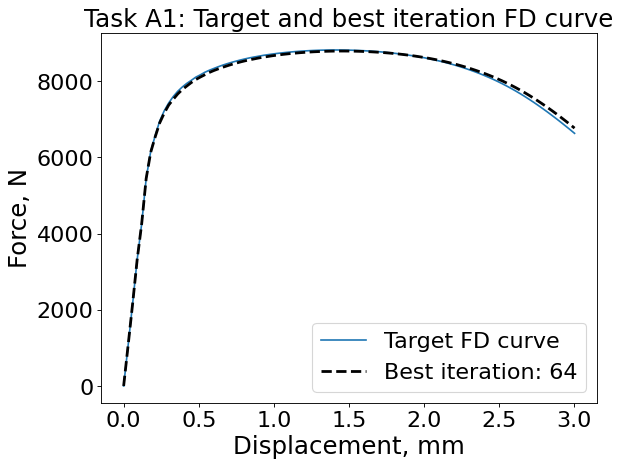

In [50]:
resultPath = info['resultPath']
targetPath = info['targetPath']

targetCurve = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expDisplacement = targetCurve['displacement/mm']
expForce = targetCurve['force/N']

targetCurve = {}
targetCurve['displacement'] = expDisplacement
targetCurve['force'] = expForce

fontsize = 20

iteration_original_FD_Curves = np.load(f"{resultPath}/iteration/common/FD_Curves_smooth.npy", allow_pickle=True).tolist()

print("The parameters of the last iteration are: ")
print(list(iteration_original_FD_Curves.keys())[-1])

figure(figsize=(8, 6), dpi=80)

for param in iteration_original_FD_Curves:
    plt.plot(iteration_original_FD_Curves[param]['displacement'], 
             iteration_original_FD_Curves[param]['force'], 
             color='orange', 
             alpha=0.3,
             #label=param
             )
plt.plot(expDisplacement, expForce, label='Target FD curve')

numberOfIterations = len(iteration_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.3, label=f'{numberOfIterations} iterations')
plt.title(f'Task {taskName}: Target and iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement, mm', fontsize=fontsize+2)
plt.ylabel('Force, N', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

##############################

iteration_interpolated_FD_Curves = interpolating_FD_Curves(iteration_original_FD_Curves, targetCurve)

figure(figsize=(8, 6), dpi=80)

for param in iteration_interpolated_FD_Curves:
    plt.plot(iteration_interpolated_FD_Curves[param]['displacement'], 
             iteration_interpolated_FD_Curves[param]['force'], 
             color='orange', 
             alpha=0.3,
             #label=param
             )
plt.plot(expDisplacement, expForce, label='Target FD curve')

numberOfIterations = len(iteration_interpolated_FD_Curves)
plt.plot([],[], color='orange', alpha=0.3, label=f'{numberOfIterations} iterations')
plt.title(f'Task {taskName}: Target and interpolated iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement, mm', fontsize=fontsize+2)
plt.ylabel('Force, N', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

##############################
figure(figsize=(8, 6), dpi=80)

iter = -1

last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[iter]['displacement']
last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[iter]['force']

plt.plot(expDisplacement, expForce, label='Target FD curve')
plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='black', alpha=1, linewidth=2.5, linestyle='--')
plt.plot([],[], color='black',alpha=1, linewidth=2.5, linestyle='--', label=f'Last iteration: {len(iteration_original_FD_Curves)}')
plt.title(f'Task {taskName}: Target and last iteration FD curve', fontsize=fontsize+2)
plt.xlabel('Displacement, mm', fontsize=fontsize+2)
plt.ylabel('Force, N', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)
plt.show()


##############################

# Plot best iteration

FD_Curve_iteration_errors = []
for param in iteration_original_FD_Curves:
    FD_Curve_iteration_errors.append(lossFD(iteration_interpolated_FD_Curves[param]['displacement'], iteration_interpolated_FD_Curves[param]['force'], expForce))

best_iteration_index = np.argmin(FD_Curve_iteration_errors)

figure(figsize=(8, 6), dpi=80)

iter = -1

last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[best_iteration_index]['displacement']
last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[best_iteration_index]['force']

plt.plot(expDisplacement, expForce, label='Target FD curve')
plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='black', alpha=1, linewidth=2.5, linestyle='--')
plt.plot([],[], color='black', alpha=1, linewidth=2.5, linestyle='--', label=f'Best iteration: {len(iteration_original_FD_Curves)}')
plt.title(f'Task {taskName}: Target and best iteration FD curve', fontsize=fontsize+2)
plt.xlabel('Displacement, mm', fontsize=fontsize+2)
plt.ylabel('Force, N', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)
plt.show()


# Iteration guess flow curve simulations

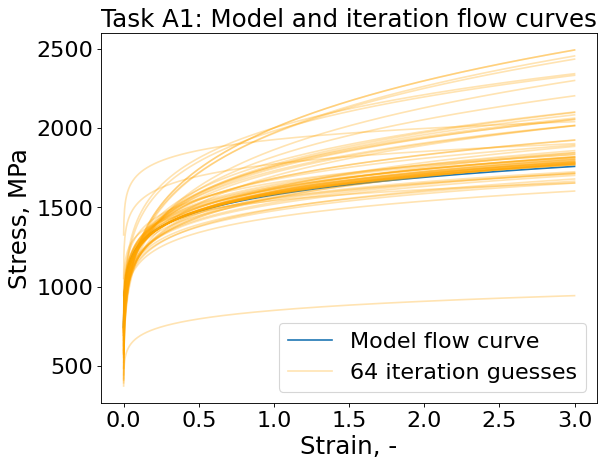

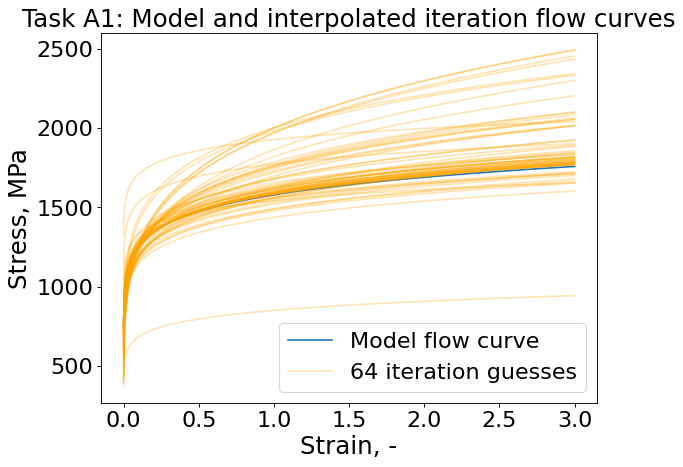

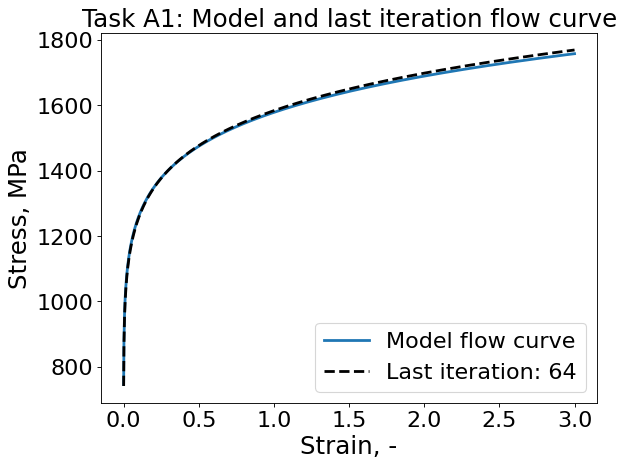

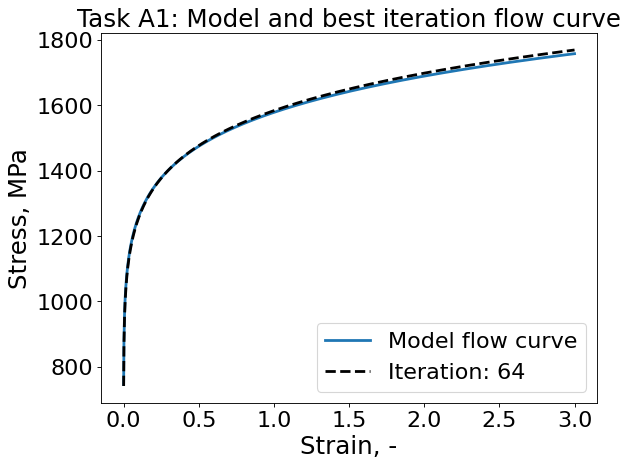

In [51]:
resultPath = info['resultPath']
targetPath = info['targetPath']

if taskName != "A4":
    target = pd.read_csv(f"{targetPath}/flowCurve.csv")
    expStress = target['stress/MPa'].to_numpy()
    expStrain = target['strain/-'].to_numpy() 

    targetCurve = {}
    targetCurve['stress'] = expStress
    targetCurve['strain'] = expStrain

    iteration_original_flowCurves = np.load(f"{resultPath}/iteration/common/flowCurves.npy", allow_pickle=True).tolist()
    iteration_interpolated_flowCurves = interpolating_flowCurves(iteration_original_flowCurves, targetCurve)

    fontsize = 20

    #############################
    figure(figsize=(8, 6), dpi=80)
    plt.plot(expStrain, expStress, label='Model flow curve')
    for param in iteration_original_flowCurves:
        plt.plot(iteration_original_flowCurves[param]['strain'], 
                iteration_original_flowCurves[param]['stress'], 
                color='orange', 
                alpha=0.3,
                #label=param
                )
    numberOfIterationSims = len(iteration_original_flowCurves)
    plt.plot([],[], color='orange', alpha=0.3, label=f'{numberOfIterationSims} iteration guesses')
    plt.title(f'Task {taskName}: Model and iteration flow curves', fontsize=fontsize+2)
    plt.xlabel('Strain, -', fontsize=fontsize+2)
    plt.ylabel('Stress, MPa', fontsize=fontsize+2)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()

    #############################
    figure(figsize=(8, 6), dpi=80)
    plt.plot(expStrain, expStress, label='Model flow curve')
    for param in iteration_interpolated_flowCurves:
        plt.plot(iteration_interpolated_flowCurves[param]['strain'], 
                iteration_interpolated_flowCurves[param]['stress'], 
                color='orange', 
                alpha=0.3,
                #label=param
                )
    numberOfIterationSims = len(iteration_interpolated_flowCurves)
    plt.plot([],[], color='orange', alpha=0.3, label=f'{numberOfIterationSims} iteration guesses')
    plt.title(f'Task {taskName}: Model and interpolated iteration flow curves', fontsize=fontsize+2)
    plt.xlabel('Strain, -', fontsize=fontsize+2)
    plt.ylabel('Stress, MPa', fontsize=fontsize+2)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()


    ##############################
    figure(figsize=(8, 6), dpi=80)

    iter = -1

    last_iteration_interpolated_strain = list(iteration_interpolated_flowCurves.values())[iter]['strain']
    last_iteration_interpolated_stress = list(iteration_interpolated_flowCurves.values())[iter]['stress']

    plt.plot(expStrain, expStress, label='Model flow curve', linewidth=2.5)
    plt.plot(last_iteration_interpolated_strain, last_iteration_interpolated_stress, color='black', linestyle= "--", alpha=1, linewidth=2.5)
    plt.plot([],[], color='black', linestyle= "--", alpha=1,  linewidth=2.5, label=f'Last iteration: {len(iteration_original_flowCurves)}')
    plt.title(f'Task {taskName}: Model and last iteration flow curve', fontsize=fontsize+2)
    plt.xlabel('Strain, -', fontsize=fontsize+2)
    plt.ylabel('Stress, MPa', fontsize=fontsize+2)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()

    ##############################
    figure(figsize=(8, 6), dpi=80)

    iter = -1

    last_iteration_interpolated_strain = list(iteration_interpolated_flowCurves.values())[best_iteration_index]['strain']
    last_iteration_interpolated_stress = list(iteration_interpolated_flowCurves.values())[best_iteration_index]['stress']

    plt.plot(expStrain, expStress, label='Model flow curve', linewidth=2.5)
    plt.plot(last_iteration_interpolated_strain, last_iteration_interpolated_stress, color='black', linestyle= "--", alpha=1, linewidth=2.5)
    plt.plot([],[], color='black', linestyle= "--", alpha=1,  linewidth=2.5, label=f'Iteration: {best_iteration_index+1}')
    plt.title(f'Task {taskName}: Model and best iteration flow curve', fontsize=fontsize+2)
    plt.xlabel('Strain, -', fontsize=fontsize+2)
    plt.ylabel('Stress, MPa', fontsize=fontsize+2)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()

else:
    # There is no model flow curve for task A4 so we just plot the iteration flow curve

    iteration_original_flowCurves = np.load(f"{resultPath}/iteration/common/flowCurves.npy", allow_pickle=True).tolist()

    fontsize = 20

    #############################
    figure(figsize=(8, 6), dpi=80)

    for param in iteration_original_flowCurves:
        plt.plot(iteration_original_flowCurves[param]['strain'], 
                iteration_original_flowCurves[param]['stress'], 
                color='orange', 
                alpha=0.3,
                #label=param
                )
    numberOfIterationSims = len(iteration_original_flowCurves)
    plt.plot([],[], color='orange', alpha=0.3, label=f'{numberOfIterationSims} iteration guesses')
    plt.title(f'Task {taskName}: Iteration flow curves', fontsize=fontsize+2)
    plt.xlabel('Strain, -', fontsize=fontsize+2)
    plt.ylabel('Stress, MPa', fontsize=fontsize+2)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()

    ##############################
    figure(figsize=(8, 6), dpi=80)

    iter = -1

    last_iteration_original_strain = list(iteration_original_flowCurves.values())[best_iteration_index]['strain']
    last_iteration_original_stress = list(iteration_original_flowCurves.values())[best_iteration_index]['stress']

    plt.plot(last_iteration_original_strain, last_iteration_original_stress, color='black', linestyle= "--", alpha=1, linewidth=2.5)
    plt.plot([],[], color='black', linestyle= "--", alpha=1,  linewidth=2.5, label=f'Iteration: {best_iteration_index+1}')
    plt.title(f'Task {taskName}: Best iteration flow curve', fontsize=fontsize+2)
    plt.xlabel('Strain, -', fontsize=fontsize+2)
    plt.ylabel('Stress, MPa', fontsize=fontsize+2)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()


# Iteration FD curves animation

In [52]:
# Animations

fontsize = 13

numberOfIterations = len(iteration_original_FD_Curves)

for iter in range(numberOfIterations):
    figure(figsize=(8, 6), dpi=80)

    last_iteration_original_displacement = list(iteration_original_FD_Curves.values())[iter]['displacement']
    last_iteration_original_force = list(iteration_original_FD_Curves.values())[iter]['force']

    plt.plot(expDisplacement, expForce, label='Target FD curve', linewidth=2.5)
    plt.plot(last_iteration_original_displacement, last_iteration_original_force, color='black', alpha=1, linestyle="--", linewidth=2.5)
    plt.plot([],[], color='black', alpha=1, linestyle="--", linewidth=2.5, label=f'Iteration {iter + 1}')
    plt.title(f'Task {taskName}: FD curves iterations', fontsize=fontsize+2)
    plt.xlabel('Displacement, mm', fontsize=fontsize+2)
    plt.ylabel('Force, N', fontsize=fontsize+2)
    if taskName == "A1":
        plt.ylim([-500, 12000])
        plt.xlim([-0.1, 3.5])
    if taskName == "A2":
        plt.ylim([-500, 12000])
        plt.xlim([-0.1, 3.5])
    if taskName == "A3":
        plt.ylim([-200, 22000])
        plt.xlim([-0.1, 2.5])
    if taskName == "A4":
        plt.ylim([-200, 22000])
        plt.xlim([-0.1, 2.5])
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize, loc=4)

    plt.savefig(f'notebooks/iteration_evolution/{taskName}_results/FD_Curves/iter_{iter+1}.png', 
        transparent = False,  
        facecolor = 'white'
        )
    plt.close()

frames = []
for iter in range(numberOfIterations):
    image = imageio.v2.imread(f'notebooks/iteration_evolution/{taskName}_results/FD_Curves/iter_{iter+1}.png')
    frames.append(image)

duration = []
if numberOfIterations < 100:
    for i in range(numberOfIterations-1):
        duration.append(300)
    duration.append(3000)
if numberOfIterations >= 100 and numberOfIterations < 200:
    for i in range(numberOfIterations-1):
        duration.append(200)
    duration.append(3000)
if numberOfIterations >= 200 and numberOfIterations < 300:
    for i in range(numberOfIterations-1):
        duration.append(100)
    duration.append(3000)

imageio.mimsave(f'notebooks/iteration_evolution/{taskName}_FD_Curves_results.gif', 
                frames, 
                duration = duration,  # ms per image
                loop = 0
                )

# Remove the video if it exists
if os.path.exists(f'notebooks/iteration_evolution/{taskName}_FD_Curves_results.mp4'):
     os.remove(f'notebooks/iteration_evolution/{taskName}_FD_Curves_results.mp4')
     
ff = ffmpy.FFmpeg(
     executable=f"{os.getcwd()}/notebooks/ffmpeg",
     inputs={f'notebooks/iteration_evolution/{taskName}_FD_Curves_results.gif': None},
     outputs={f'notebooks/iteration_evolution/{taskName}_FD_Curves_results.mp4': '-pix_fmt yuv420p'}
)
ff.run()

(None, None)

# Iteration flow curves animation

In [53]:
# Animations

fontsize = 13

numberOfIterations = len(iteration_original_flowCurves)

for iter in range(numberOfIterations):
    figure(figsize=(8, 6), dpi=80)

    last_iteration_interpolated_strain = list(iteration_interpolated_flowCurves.values())[iter]['strain']
    last_iteration_interpolated_stress = list(iteration_interpolated_flowCurves.values())[iter]['stress']
    
    if taskName != "A4":
        plt.plot(expStrain, expStress, label='Model flow curve', linewidth=2.5)
    plt.plot(last_iteration_interpolated_strain, last_iteration_interpolated_stress, color='black', alpha=1, linestyle="--", linewidth=2.5)
    plt.plot([],[], color='black', alpha=1, linestyle="--", linewidth=2.5, label=f'Iteration {iter + 1}')
    plt.title(f'Task {taskName}: flow curves iterations', fontsize=fontsize+2)
    plt.xlabel('Strain, -', fontsize=fontsize+2)
    plt.ylabel('Stress, MPa', fontsize=fontsize+2)
    if taskName == "A1":
        plt.ylim([-200, 3000])
        plt.xlim([-0.1, 3.5])
    if taskName == "A2":
        plt.ylim([-200, 3000])
        plt.xlim([-0.1, 3.5])
    if taskName == "A3":
        plt.ylim([-200, 15000])
        plt.xlim([-0.1, 2.5])
    if taskName == "A4":
        plt.ylim([-200, 15000])
        plt.xlim([-0.1, 2.5])
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize, loc=4)

    plt.savefig(f'notebooks/iteration_evolution/{taskName}_results/flowCurves/iter_{iter+1}.png', 
        transparent = False,  
        facecolor = 'white'
        )
    plt.close()

frames = []
for iter in range(numberOfIterations):
    image = imageio.v2.imread(f'notebooks/iteration_evolution/{taskName}_results/flowCurves/iter_{iter+1}.png')
    frames.append(image)

duration = []
if numberOfIterations < 100:
    for i in range(numberOfIterations-1):
        duration.append(300)
    duration.append(3000)
if numberOfIterations >= 100 and numberOfIterations < 200:
    for i in range(numberOfIterations-1):
        duration.append(200)
    duration.append(3000)
if numberOfIterations >= 200 and numberOfIterations < 300:
    for i in range(numberOfIterations-1):
        duration.append(100)
    duration.append(3000)


imageio.mimsave(f'notebooks/iteration_evolution/{taskName}_flowCurves_results.gif', 
                frames, 
                duration = duration,  # ms per image
                loop = 0
                )

# Remove the video if it exists
if os.path.exists(f'notebooks/iteration_evolution/{taskName}_flowCurves_results.mp4'):
     os.remove(f'notebooks/iteration_evolution/{taskName}_flowCurves_results.mp4')
     
ff = ffmpy.FFmpeg(
     executable=f"{os.getcwd()}/notebooks/ffmpeg",
     inputs={f'notebooks/iteration_evolution/{taskName}_flowCurves_results.gif': None},
     outputs={f'notebooks/iteration_evolution/{taskName}_flowCurves_results.mp4': '-pix_fmt yuv420p'},
)

ff.run()

(None, None)